In [128]:
#Ejercicio creado por José Pablo Cuevas Cázares el 23/11/18
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as k
%matplotlib inline 
c=k.c
h=k.Planck
k=k.Boltzmann
datos=np.loadtxt('IRCF.txt')
#En este apartado declaro todas las librerías necesarias. También leo los datos del archivo de texto con la librería loadtxt

In [140]:
fr=datos[:,0:1] #Unidades 1/cm
es=datos[:,1:2] #Unidades MJy/sr
inc=datos[:,3:4] #Unidades kJy/sr
m=inc/1000 #Cambio de kJy a MJy
c2=c*100 #Cambio de m a cm para c
s=1/c2 #Equivalencia de 1s es igual a c2
fr2=((pow(fr,-1))*s)
fr3=(pow(fr2,-1))
x=np.linspace(0,0,(len(T)))
r=np.linspace(0,0,(len(T)))
er=10000
Tn=0

In [150]:
T=np.linspace(1,5,100000)
v=fr3

def I(v,T):
    z=(((h*(pow(v,3)))/(pow(c,2)))*(1/((np.exp((h*v)/(k*T)))-1)))*(pow(10,20))#En este apartado defino la función de la irradiancia
    return z
#Aquí cambio de irradiancia a Jy, que haciendo el análisis dimensional, es la misma unidad pero multiplicada por un factor de 10^26


La temperatura del universo es 4.037430374303743


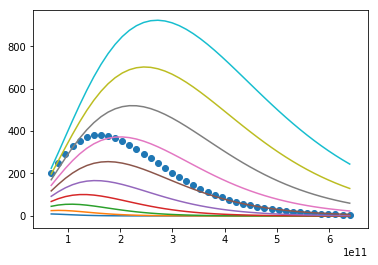

In [154]:
for j in range (len(T)):#En este apartado hago que tome una variable hasta el número de elementos que tiene T
    x1=0 
    p=I(v,T[j])
    for l in range (len(inc)):
        x[l]=pow(((es[l]-p[l])/(inc[l])),2)
        x1=x1+x[l]#En esta parte hago la operación vista en clase para encontrar la temperatura adecuada
    if (x1<er):
        Tn=T[j]
        x1=er
    if (j%10000==0):
        plt.plot(v,p)#En este apartado solamente imprimo ciertas curvas para que no haya muchas de ellas en la gráfica final
p=I(v,Tn)
plt.scatter(v,es)
print("La temperatura del universo es",Tn)
plt.xlabel()


In [ ]:
fig,axs=plt.subplots(2,1,sharex=True)
fig.subplots_adjust(hspace=0)
axs[0].plot(fr,T)
axs[1].errorbar(fr,r,inc)